Importing the dependencies

In [5]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [6]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('/content/movies.csv', on_bad_lines='skip')

In [7]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [8]:
# number of rows and columns in the data frame

movies_data.shape

(4803, 24)

In [9]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [10]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [11]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [12]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [13]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [14]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [15]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

Cosine Similarity

In [16]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [17]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [18]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [19]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : iron


In [20]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Nixon', 'Airborne', 'Prison']


In [22]:
close_match = find_close_match[0]
print(close_match)

Nixon


In [23]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

1091


In [24]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(0.018519136073326208)), (1, np.float64(0.02374353974959803)), (2, np.float64(0.0)), (3, np.float64(0.007903748107679404)), (4, np.float64(0.08713410191090512)), (5, np.float64(0.004498320103775112)), (6, np.float64(0.0)), (7, np.float64(0.0)), (8, np.float64(0.0)), (9, np.float64(0.0)), (10, np.float64(0.02082976462842167)), (11, np.float64(0.0)), (12, np.float64(0.0)), (13, np.float64(0.0040030573893398355)), (14, np.float64(0.018398462783327824)), (15, np.float64(0.0)), (16, np.float64(0.0)), (17, np.float64(0.0)), (18, np.float64(0.06440567924308724)), (19, np.float64(0.007531338515282977)), (20, np.float64(0.03179588243158381)), (21, np.float64(0.0)), (22, np.float64(0.003921837068167465)), (23, np.float64(0.007509699456013058)), (24, np.float64(0.024148999389780556)), (25, np.float64(0.002754960986859542)), (26, np.float64(0.0422881823871899)), (27, np.float64(0.003955652055767714)), (28, np.float64(0.004342839151920344)), (29, np.float64(0.02435215041180489)), (30

In [25]:
len(similarity_score)

4803

In [26]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(1091, np.float64(1.0)), (656, np.float64(0.21917862344912128)), (1355, np.float64(0.20804891155595603)), (1814, np.float64(0.18256368138076728)), (2128, np.float64(0.16268044685774716)), (1687, np.float64(0.15808019654828176)), (2078, np.float64(0.1434688269895359)), (4152, np.float64(0.13842955694855835)), (401, np.float64(0.13049956805983598)), (1915, np.float64(0.11792887417890514)), (2629, np.float64(0.11752560161124763)), (2592, np.float64(0.11725312444960423)), (2763, np.float64(0.11446793815913281)), (2359, np.float64(0.11040874995836135)), (1836, np.float64(0.10957328736722789)), (2547, np.float64(0.10662047754392087)), (681, np.float64(0.10488318294542939)), (2168, np.float64(0.10461271223238493)), (4073, np.float64(0.10308755603980099)), (1921, np.float64(0.10273550761260425)), (2941, np.float64(0.1010430657238445)), (753, np.float64(0.09936392813237993)), (4110, np.float64(0.09845358638900818)), (3472, np.float64(0.09830889051083119)), (1351, np.float64(0.09812641249672396

In [34]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give


Movie Recommendation Sytem

In [33]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : batman
Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give


In [29]:
print("Shape of the similarity matrix:", similarity.shape)
print("\nFirst 5 rows and columns of the similarity matrix:\n", similarity[:5, :5])
print("\nSimilarity score between movie at index 0 and movie at index 1:", similarity[0, 1])
print("Similarity score between movie at index 100 and movie at index 200:", similarity[100, 200])

Shape of the similarity matrix: (4803, 4803)

First 5 rows and columns of the similarity matrix:
 [[1.         0.07219487 0.037733   0.0125202  0.10702574]
 [0.07219487 1.         0.03281499 0.0207415  0.03305463]
 [0.037733   0.03281499 1.         0.05179498 0.05772601]
 [0.0125202  0.0207415  0.05179498 1.         0.00671708]
 [0.10702574 0.03305463 0.05772601 0.00671708 1.        ]]

Similarity score between movie at index 0 and movie at index 1: 0.07219486822992488
Similarity score between movie at index 100 and movie at index 200: 0.02798003179356458


In [30]:
# Exclude the diagonal elements
similarity_no_diagonal = similarity[~np.eye(similarity.shape[0], dtype=bool)].reshape(similarity.shape[0], -1)

# Find the maximum similarity score (excluding diagonal)
max_similarity_score = np.max(similarity_no_diagonal)

# Find the minimum similarity score (excluding zeros)
min_similarity_score = np.min(similarity_no_diagonal[similarity_no_diagonal > 0])

# Find the indices of the movie pair with the maximum similarity score
# Need to adjust indices because we removed the diagonal
max_similarity_index = np.argmax(similarity_no_diagonal)
max_row_index, max_col_offset = np.unravel_index(max_similarity_index, similarity_no_diagonal.shape)

# The actual column index needs to account for the removed diagonal element
max_col_index = max_col_offset + 1 if max_col_offset >= max_row_index else max_col_offset

# Find the indices of the movie pair with the minimum non-zero similarity score
# Filter out zero values and get their indices
non_zero_indices = np.where(similarity_no_diagonal > 0)
min_similarity_index_flat = np.argmin(similarity_no_diagonal[non_zero_indices])
min_row_index_offset, min_col_offset_offset = (non_zero_indices[0][min_similarity_index_flat], non_zero_indices[1][min_similarity_index_flat])

# The actual row and column indices need to account for the removed diagonal element
min_row_index = np.where(similarity == similarity_no_diagonal[min_row_index_offset, min_col_offset_offset])[0][0]
min_col_index = np.where(similarity == similarity_no_diagonal[min_row_index_offset, min_col_offset_offset])[1][0]


# Get the movie titles
max_movie_title1 = movies_data.iloc[max_row_index]['title']
max_movie_title2 = movies_data.iloc[max_col_index]['title']
min_movie_title1 = movies_data.iloc[min_row_index]['title']
min_movie_title2 = movies_data.iloc[min_col_index]['title']

# Print the results
print(f"Maximum similarity score (excluding diagonal): {max_similarity_score:.4f}")
print(f"Most similar movies: '{max_movie_title1}' and '{max_movie_title2}'")
print(f"\nMinimum non-zero similarity score: {min_similarity_score:.4f}")
print(f"Least similar movies: '{min_movie_title1}' and '{min_movie_title2}'")

Maximum similarity score (excluding diagonal): 0.8301
Most similar movies: 'High School Musical 3: Senior Year' and 'High School Musical 2'

Minimum non-zero similarity score: 0.0006
Least similar movies: 'All That Jazz' and 'Y Tu Mamá También'


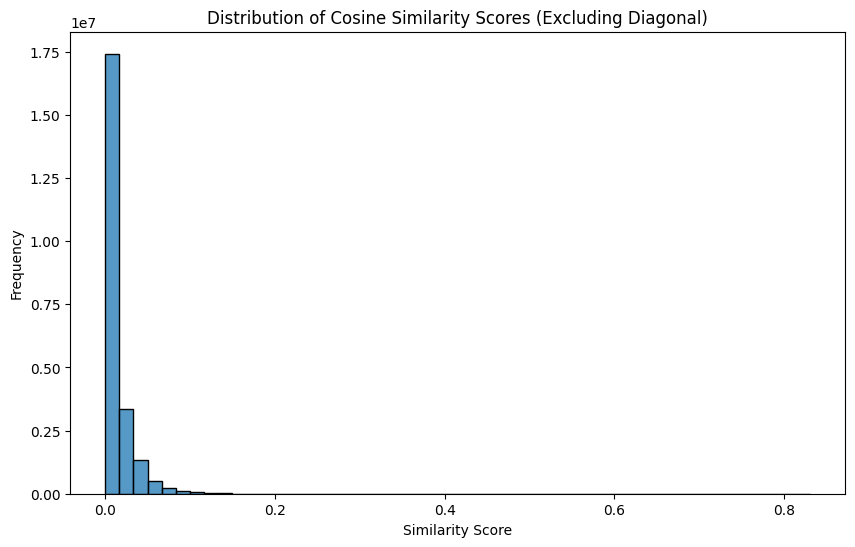

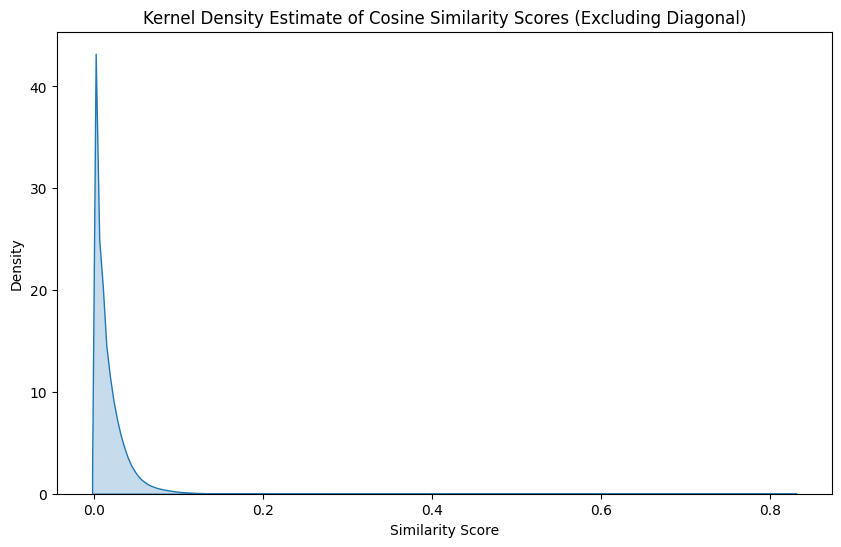

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(similarity_no_diagonal.flatten(), bins=50, kde=False)
plt.title("Distribution of Cosine Similarity Scores (Excluding Diagonal)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(similarity_no_diagonal.flatten(), fill=True)
plt.title("Kernel Density Estimate of Cosine Similarity Scores (Excluding Diagonal)")
plt.xlabel("Similarity Score")
plt.ylabel("Density")
plt.show()

In [32]:
# Choose a few movies to examine
movie_titles_to_examine = ['Iron Man', 'The Dark Knight', 'Avatar', 'Titanic']

for movie_title in movie_titles_to_examine:
    print(f"\nMovies similar to '{movie_title}':")

    # Find the index of the movie
    try:
        index_of_the_movie = movies_data[movies_data.title == movie_title]['index'].values[0]
    except IndexError:
        print(f"Movie '{movie_title}' not found in the dataset.")
        continue

    # Get similarity scores for the movie
    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    # Sort movies based on similarity score
    sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

    # Print the top 10 similar movies (excluding the movie itself)
    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        if index == index_of_the_movie:
            continue
        title_from_index = movies_data[movies_data.index==index]['title'].values[0]
        similarity_value = movie[1]
        if (i <= 10):
            print(f"{i}. {title_from_index} (Similarity: {similarity_value:.4f})")
            i+=1



Movies similar to 'Iron Man':
1. Iron Man 2 (Similarity: 0.4089)
2. Iron Man 3 (Similarity: 0.3147)
3. Avengers: Age of Ultron (Similarity: 0.2394)
4. The Avengers (Similarity: 0.2270)
5. Captain America: Civil War (Similarity: 0.2157)
6. Captain America: The Winter Soldier (Similarity: 0.2062)
7. Ant-Man (Similarity: 0.1957)
8. X-Men (Similarity: 0.1670)
9. Made (Similarity: 0.1609)
10. X-Men: Apocalypse (Similarity: 0.1530)

Movies similar to 'The Dark Knight':
1. The Dark Knight Rises (Similarity: 0.4739)
2. Batman Begins (Similarity: 0.4404)
3. The Prestige (Similarity: 0.2533)
4. Batman Returns (Similarity: 0.2029)
5. Batman & Robin (Similarity: 0.1877)
6. Kick-Ass 2 (Similarity: 0.1825)
7. Kick-Ass (Similarity: 0.1793)
8. Batman (Similarity: 0.1776)
9. Superman (Similarity: 0.1616)
10. Brokeback Mountain (Similarity: 0.1530)

Movies similar to 'Avatar':
1. Alien (Similarity: 0.2495)
2. Aliens (Similarity: 0.2484)
3. Guardians of the Galaxy (Similarity: 0.2451)
4. Star Trek Beyon